In [3]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf

In [4]:
codes = pd.read_csv('../EXTR_LookUp.csv')

In [5]:
df = pd.read_csv('../leana_m3')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_bldgr_3,z_bldgr_4,z_bldgr_5,z_bldgr_6,z_bldgr_7,z_bldgr_8,z_bldgr_9,z_bldgr_10,z_bldgr_11,z_bldgr_12
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,-0.01285,-0.032353,-0.106291,-0.32604,-0.820224,1.504967,-0.388321,-0.211638,-0.092149,-0.025707
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,-0.01285,-0.032353,-0.106291,-0.32604,-0.820224,1.504967,-0.388321,-0.211638,-0.092149,-0.025707


# Model Iterations - take 4

In this notebook I will iterate further on top of my models including building grade, experiment with taking out higher correlated building grades as well as see if adding township to the model helps anything.

# Model 13 - recap

In this iteration we model exactly the same as model 12 but with z-scores to be able to interpret the coefficients a little more easily.

In [6]:
features13 = ['saleprice',
              'squarefeettotalliving',
              'bathtotcount',
              'squarefeetdeck',
              'sqftporch',
              'bldgr_3',
              'bldgr_4',
              'bldgr_5',
              'bldgr_6',
              'bldgr_7',
              'bldgr_8',
              'bldgr_9',
              'bldgr_10',
              'bldgr_11','bldgr_12']

In [7]:
features13z = list(map(lambda x: 'z_' + x, features13))

In [8]:
model13 = mf.model(features13z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1100.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:12:54   Log-Likelihood:                -20200.
No. Observations:               18170   AIC:                         4.043e+04
Df Residuals:                   18155   BIC:                         4.055e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

So we've stayed the same but we can compare coefficients a little more easily.  What is difficult to interpret is the coefficients of building grade - they're all negative, what does this mean exactly?  They make price go down?  

I also notice that bathroom count has a high p-val so perhaps this feature isn't as strong...

Ideas to investigate further:
- Do a bar plot of building grade mean sales prices to get an idea of what this data looks like
- Create a heatmap for these features

In [9]:
x_features13 = ['squarefeettotalliving', 'bathtotcount',
              'squarefeetdeck',
              'sqftporch',
              'bldgr_3',
              'bldgr_4',
              'bldgr_5',
              'bldgr_6',
              'bldgr_7',
              'bldgr_8',
              'bldgr_9',
              'bldgr_10',
              'bldgr_11','bldgr_12']

Text(0.5, 1, 'Heat Map of Feature Multicollinearity')

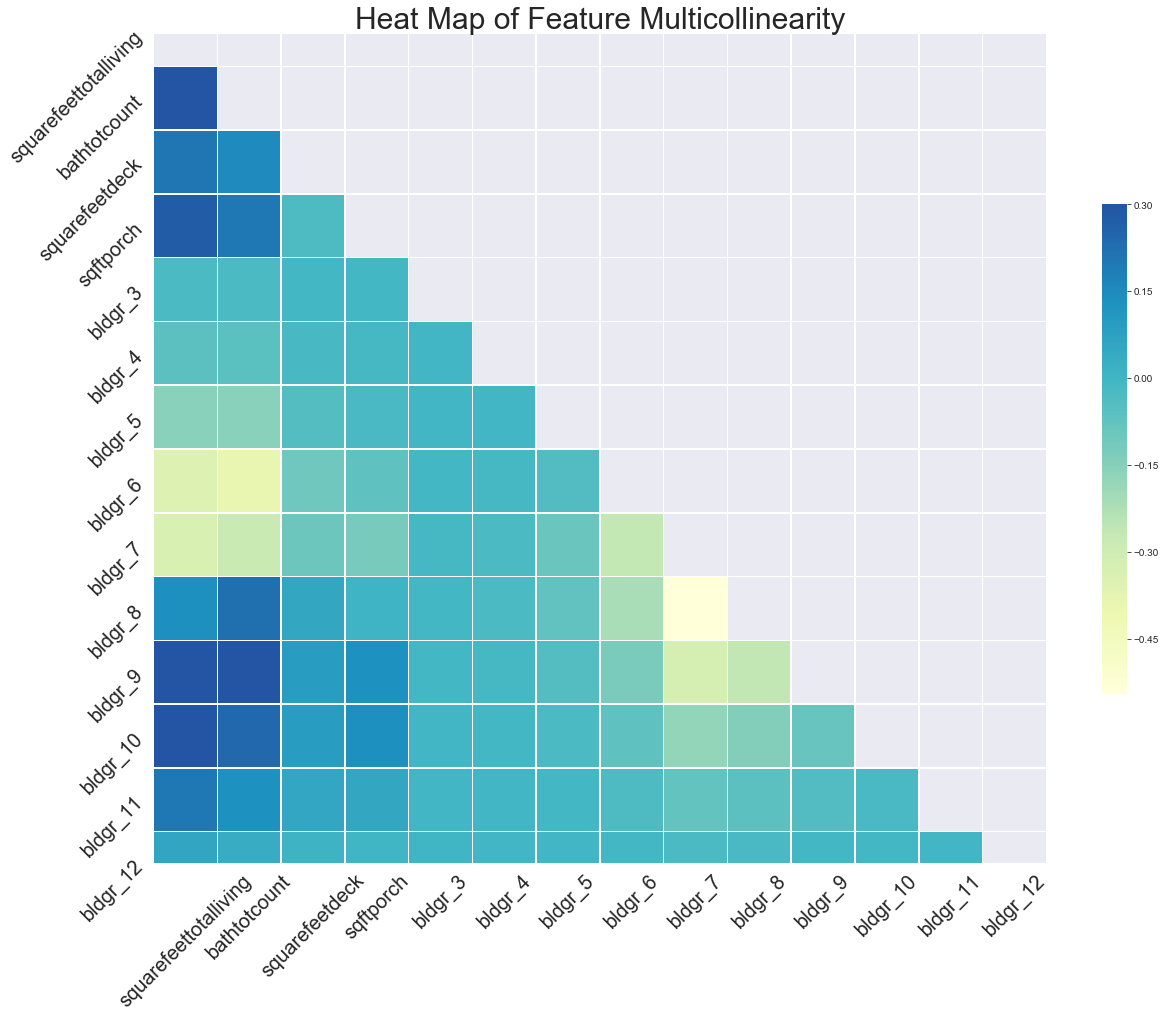

In [10]:
df_x_feats = df.loc[:, x_features13]

x_corrs = df_x_feats.corr()

mask = np.triu(np.ones_like(x_corrs, dtype=np.bool))
f, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(x_corrs, mask = mask, cmap="YlGnBu", vmax = 0.3, 
            center = 0, square = True, linewidths = 0.5, 
            cbar_kws = {'shrink': 0.5})
ax.tick_params(axis='both', which='major', labelsize=20, labelrotation = 45)
ax.set_title('Heat Map of Feature Multicollinearity', fontsize = 30)

In [11]:
# a reminder of what these codes mean:
codes[codes['LUType'] == 82]['LUDescription']

1150    1  Cabin                                      ...
1151    10 Very Good                                  ...
1152    11 Excellent                                  ...
1153    12 Luxury                                     ...
1154    13 Mansion                                    ...
1155    2  Substandard                                ...
1156    Exceptional Properties                        ...
1157    3  Poor                                       ...
1158    4  Low                                        ...
1159    5  Fair                                       ...
1160    6  Low Average                                ...
1161    7  Average                                    ...
1162    8  Good                                       ...
1163    9  Better                                     ...
Name: LUDescription, dtype: object

# Model 14

In this model I add township to my model 13 features.

In [12]:
# explore township:
df['township'].unique()

array([25., 26., 24., 22., 21., 23., 20., 19.])

In [13]:
df.township.dtype

dtype('float64')

Let's visualise the current relationship between `saleprice` and `township` before we decide to categorise the data:

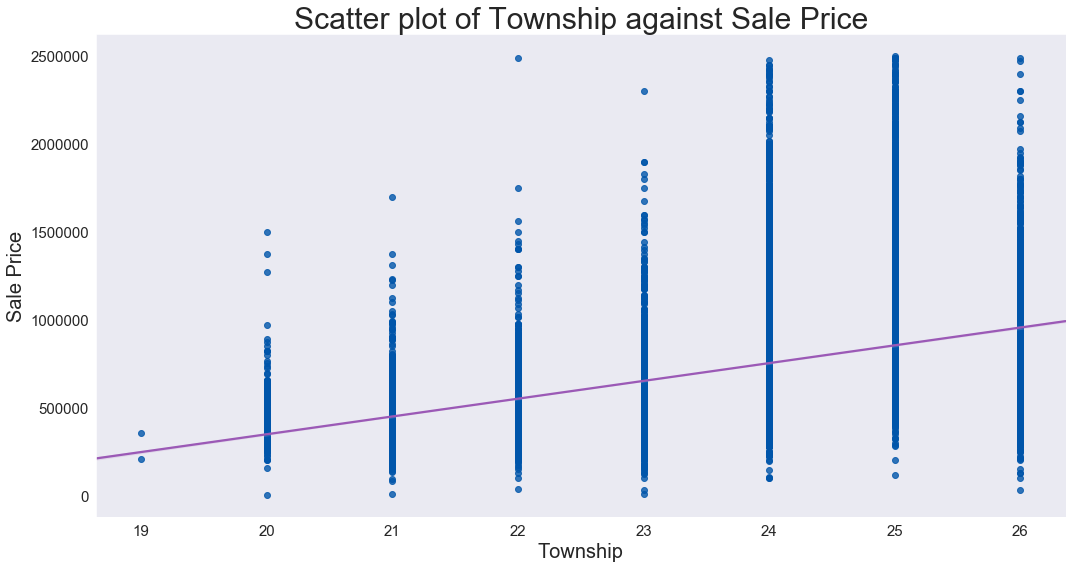

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'township', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "#9b59b6"});
ax.set_title('Scatter plot of Township against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Township', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [15]:
# make township into int to strip the decimal place
df['township'] = df['township'].astype('int')

In [16]:
df.township.unique()

array([25, 26, 24, 22, 21, 23, 20, 19])

We can see that there actually seems to be a fairly strong linear relationship between Township and Sale Price in King County.  Let's dummy out these variables and add them to our model.

In [17]:
### I need to turn this process into a function

# change to category type
df['township'] = df['township'].astype('category')

# create dummies
township_dummies = pd.get_dummies(df['township'], prefix='twnshp', drop_first=True)

# update dataframe
df = pd.concat([df, township_dummies], axis=1)

In [18]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_bldgr_10,z_bldgr_11,z_bldgr_12,twnshp_20,twnshp_21,twnshp_22,twnshp_23,twnshp_24,twnshp_25,twnshp_26
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,-0.211638,-0.092149,-0.025707,0,0,0,0,0,1,0
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,-0.211638,-0.092149,-0.025707,0,0,0,0,0,0,1
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.211638,-0.092149,-0.025707,0,0,0,0,0,0,1
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.211638,-0.092149,-0.025707,0,0,0,0,0,0,1
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,-0.211638,-0.092149,-0.025707,0,0,0,0,1,0,0


In [19]:
# Use our same features from previous model and add townships
town_cols = []
for column in df.columns:
    if column.startswith('twnshp'):
        town_cols.append(column)

In [20]:
town_cols

['twnshp_20',
 'twnshp_21',
 'twnshp_22',
 'twnshp_23',
 'twnshp_24',
 'twnshp_25',
 'twnshp_26']

In [21]:
for feature in town_cols:
    mf.z_score(feature, df)

In [22]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,twnshp_24,twnshp_25,twnshp_26,z_twnshp_20,z_twnshp_21,z_twnshp_22,z_twnshp_23,z_twnshp_24,z_twnshp_25,z_twnshp_26
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,1,0,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,1.950743,-0.484802
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,1,-0.127128,-0.35385,-0.369899,-0.419483,-0.506685,-0.512597,2.062583
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,1,0,0,-0.127128,-0.35385,-0.369899,-0.419483,1.973505,-0.512597,-0.484802


In [23]:
towns_z = list(map(lambda x: 'z_' + x, town_cols))

In [24]:
features14z = features13z + towns_z

In [25]:
features14z

['z_saleprice',
 'z_squarefeettotalliving',
 'z_bathtotcount',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_9',
 'z_bldgr_10',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_20',
 'z_twnshp_21',
 'z_twnshp_22',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

In [85]:
model14 = mf.model(features14z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2098.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:26:48   Log-Likelihood:                -14590.
No. Observations:               18170   AIC:                         2.922e+04
Df Residuals:                   18148   BIC:                         2.940e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

So we've had a significant increase in the R^2 value however this can often come by default of adding more features.  We see high p-vals for townships 20, 21, 22 - perhaps we drop these?  The rest show significance however.  Bathroom count is also showing a high p-val.  Let's check the assumptions to see how well our model is really doing:

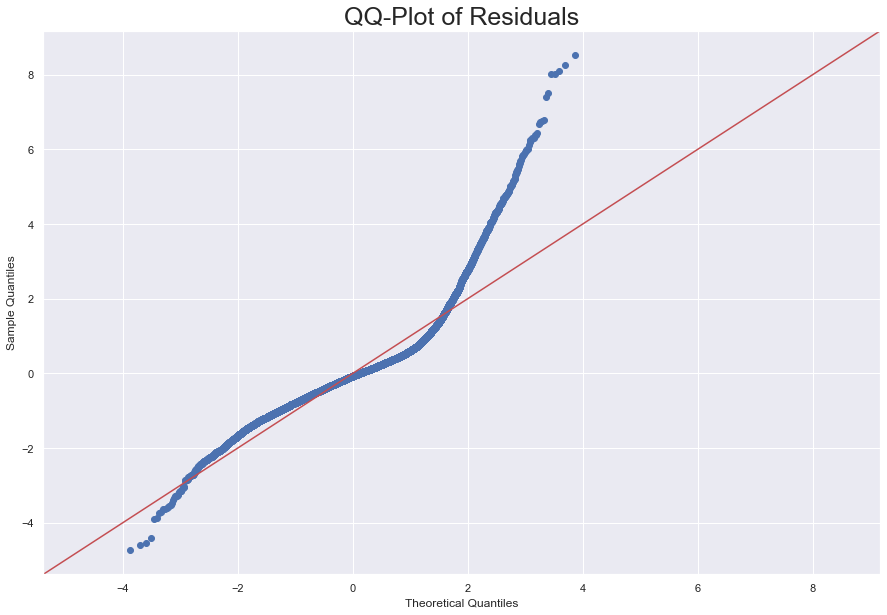

In [135]:
mf.normality_assumption(model14)

So our normality assumption has gotten worse.

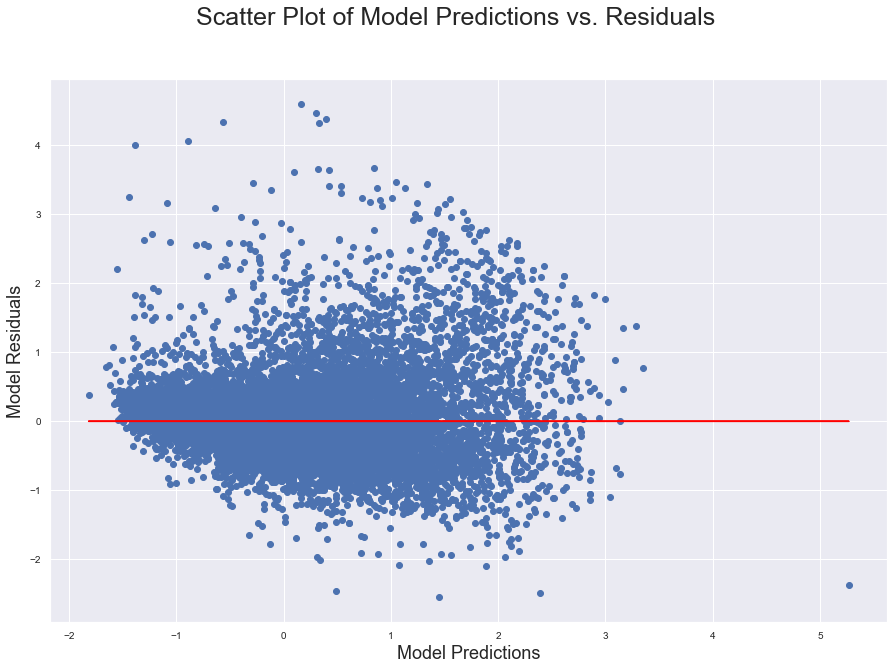

In [136]:
mf.homo_assumption(model14, df)

Homoscadascisity doesn't look as good as model 13 but isn't too bad. 

Let's view a heatmap of the independent variables and see if we should drop anything:

In [104]:
copy = features14z.copy()

In [105]:
copy.remove('z_saleprice')

In [106]:
x_features14 = copy
x_features14

['z_squarefeettotalliving',
 'z_bathtotcount',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_9',
 'z_bldgr_10',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_20',
 'z_twnshp_21',
 'z_twnshp_22',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

Text(0.5, 1, 'Heat Map of Feature Multicollinearity')

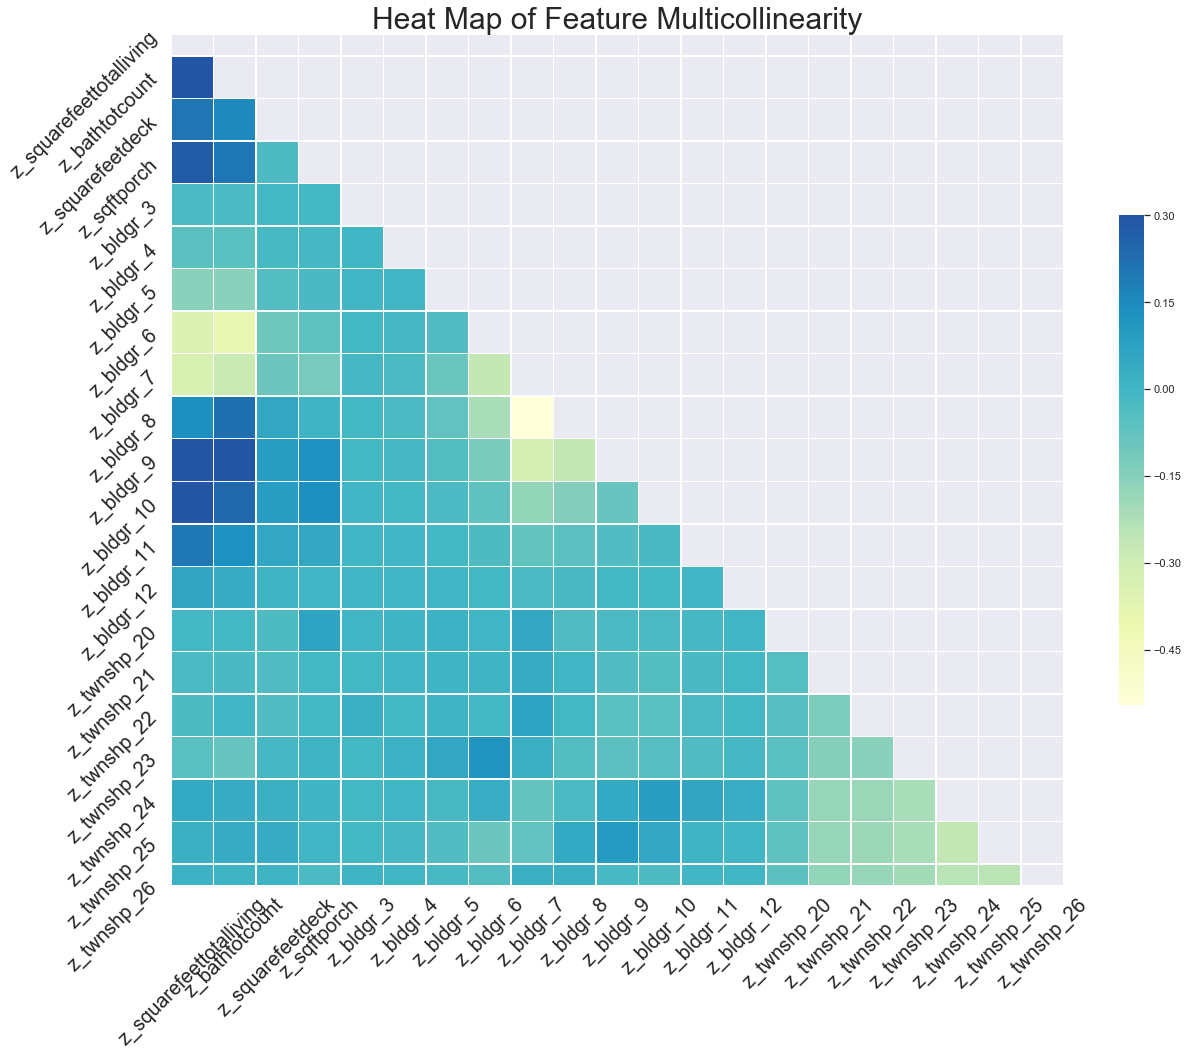

In [107]:
df_x_feats = df.loc[:, x_features14]

x_corrs = df_x_feats.corr()

mask = np.triu(np.ones_like(x_corrs, dtype=np.bool))
f, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(x_corrs, mask = mask, cmap="YlGnBu", vmax = 0.3, 
            center = 0, square = True, linewidths = 0.5, 
            cbar_kws = {'shrink': 0.5})
ax.tick_params(axis='both', which='major', labelsize=20, labelrotation = 45)
ax.set_title('Heat Map of Feature Multicollinearity', fontsize = 30)

Again, only bathroom count, building grade 9 and 10 are showing high multicollinearity with total square foot living.  Let's remove these features and see what it does.

# Model 15

In this iteration, we remove `z_bldgr_9`, `z_bldgr_10` and `z_bathtotcount` from model 14 features because they show multicollinearity with square feet total living.  I want to see if this will impove our model.

In [111]:
features15z = features14z.copy()

In [113]:
to_remove = ['z_bldgr_9', 'z_bldgr_10', 'z_bathtotcount']
for item in to_remove:
    features15z.remove(item)

features15z

['z_saleprice',
 'z_squarefeettotalliving',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_20',
 'z_twnshp_21',
 'z_twnshp_22',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

In [115]:
model15 = mf.model(features15z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2370.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:39:47   Log-Likelihood:                -14797.
No. Observations:               18170   AIC:                         2.963e+04
Df Residuals:                   18151   BIC:                         2.978e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

So, we've had a small reduction in our R^2 value but let's check the assumptions:

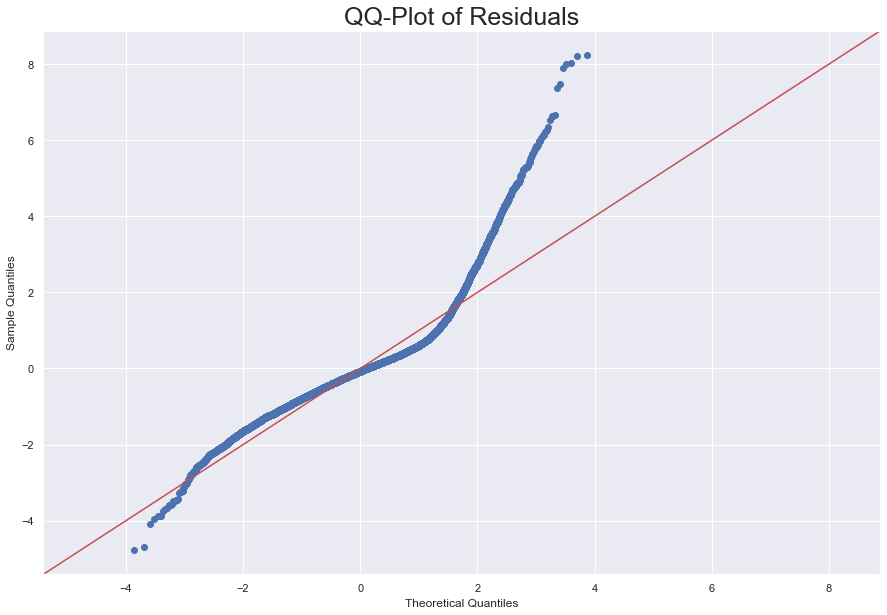

In [116]:
mf.normality_assumption(model15)

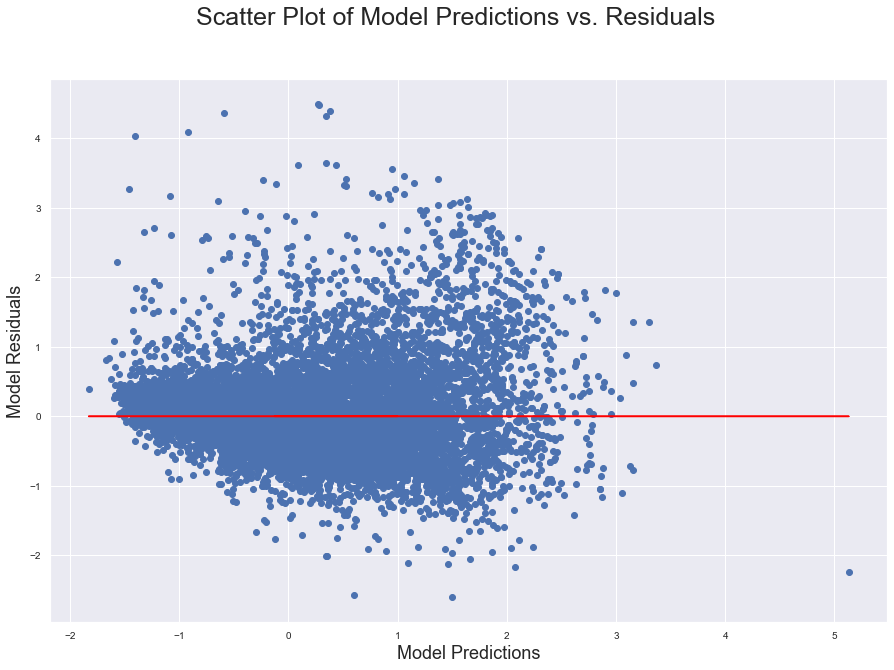

In [118]:
mf.homo_assumption(model15, df)

Assumptions are very much the same.  Next, I'm going to try removing the townships with high p-vals.

# Model 16

In this iteration, I remove townships 20, 21, 22 as they have high p-vals and so there is no significant evidence to suggest that their coefficients are influencing sale price.

In [119]:
features16z = features15z.copy()

to_remove = ['z_twnshp_20', 'z_twnshp_21', 'z_twnshp_22']
for item in to_remove:
    features16z.remove(item)

features16z

['z_saleprice',
 'z_squarefeettotalliving',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

In [120]:
model16 = mf.model(features16z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2830.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:44:31   Log-Likelihood:                -14830.
No. Observations:               18170   AIC:                         2.969e+04
Df Residuals:                   18154   BIC:                         2.982e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

Again, we see a small reduction in R^2 but all but 2 features have significant p-vals.  `z_bldgr_3` and `z_bldgr_4` show p-values above $\alpha$ = 0.05.

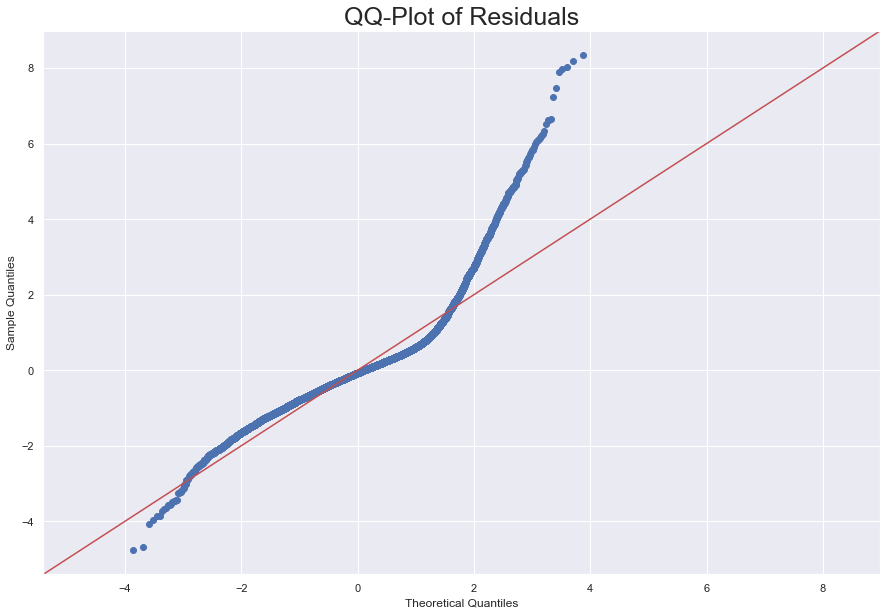

In [121]:
mf.normality_assumption(model16)

Again, this looks much the same.

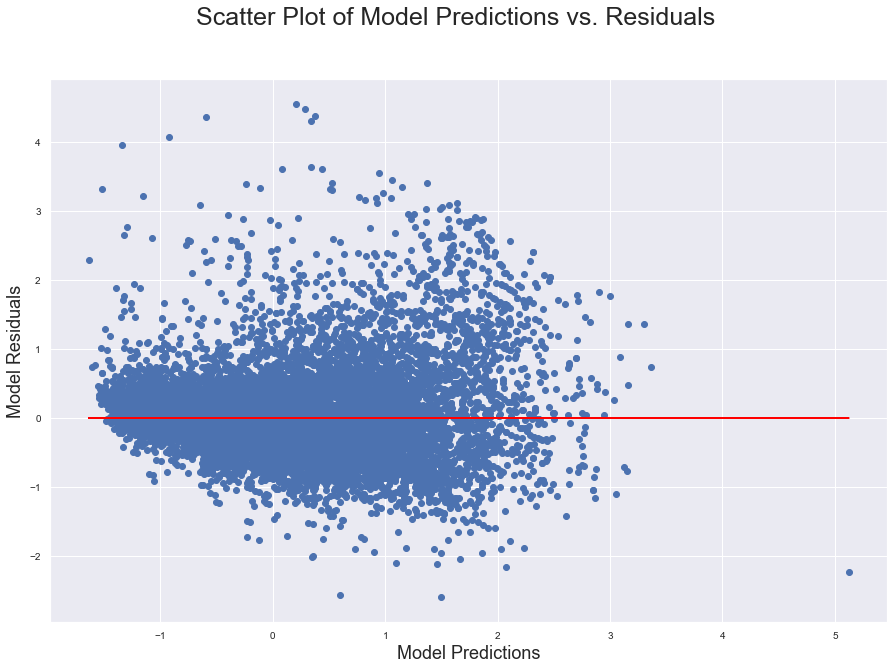

In [123]:
mf.homo_assumption(model16, df)

Much the same again. 

It might not be worth it, but let's try removing building grades 3 and 4 from the model.  This may take away too much information but let's try it.  

# Model 17

In this iteration we remove building grades 3 and 4 due to their high p-values.

In [125]:
features17z = features16z.copy()

to_remove = ['z_bldgr_3', 'z_bldgr_4']
for item in to_remove:
    features17z.remove(item)

features17z

['z_saleprice',
 'z_squarefeettotalliving',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

In [126]:
model17 = mf.model(features17z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3265.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:49:05   Log-Likelihood:                -14831.
No. Observations:               18170   AIC:                         2.969e+04
Df Residuals:                   18156   BIC:                         2.980e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

So now we have the same r^2 but all significant p-vals.  Let's check assumptions.

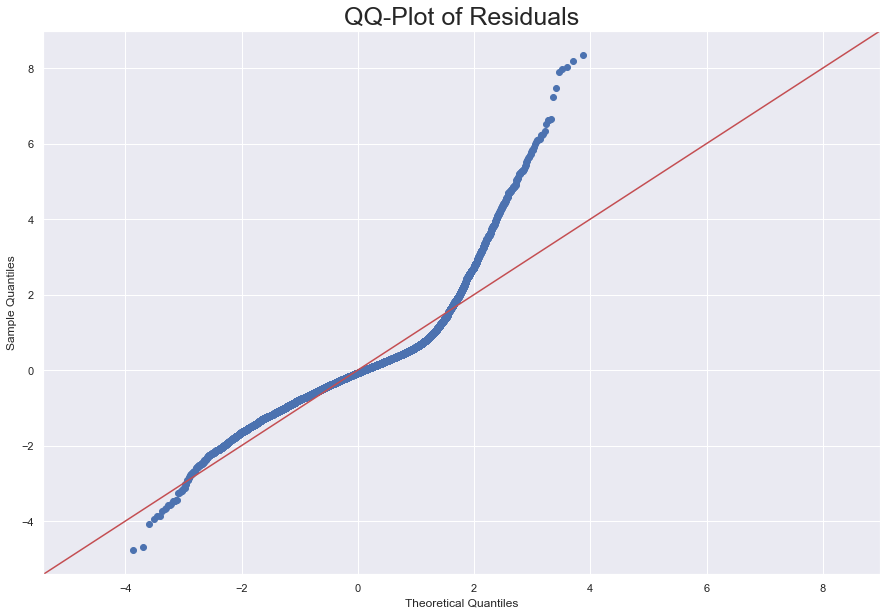

In [127]:
mf.normality_assumption(model17)

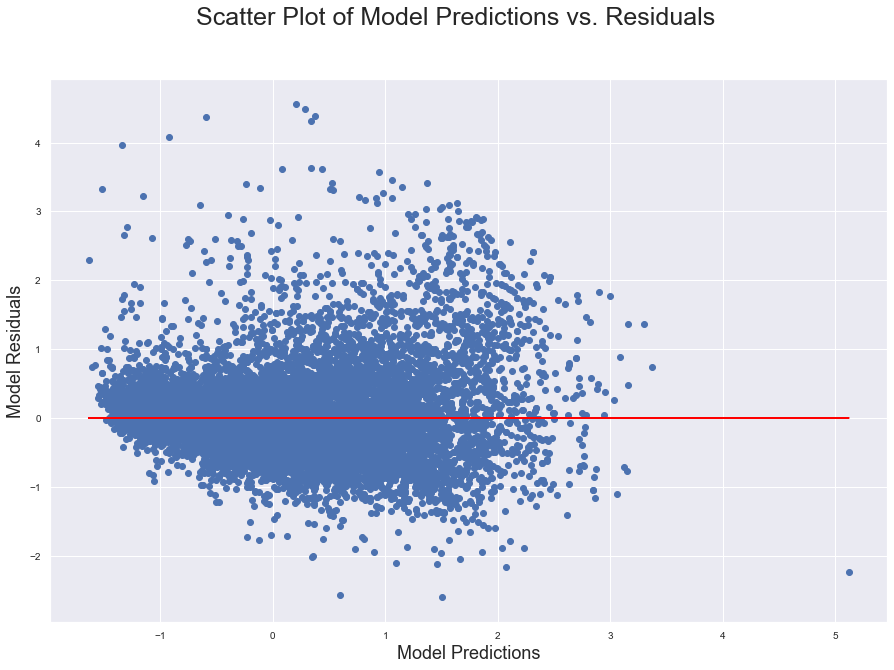

In [129]:
mf.homo_assumption(model17, df)

No changes.  For this reason, it would be best to stick with model 14 that had the highest r^2 value of 0.708 since the assumptions are met much the same.

I wonder if we JUST removed bathroom count, since it has high correlation with other features and a high p-value.

# Model 18

In this iteration we take the features from model 14 and just remove bathroom count.

In [131]:
features18z = features14z.copy()

features18z.remove('z_bathtotcount')

features18z

['z_saleprice',
 'z_squarefeettotalliving',
 'z_squarefeetdeck',
 'z_sqftporch',
 'z_bldgr_3',
 'z_bldgr_4',
 'z_bldgr_5',
 'z_bldgr_6',
 'z_bldgr_7',
 'z_bldgr_8',
 'z_bldgr_9',
 'z_bldgr_10',
 'z_bldgr_11',
 'z_bldgr_12',
 'z_twnshp_20',
 'z_twnshp_21',
 'z_twnshp_22',
 'z_twnshp_23',
 'z_twnshp_24',
 'z_twnshp_25',
 'z_twnshp_26']

In [132]:
model18 = mf.model(features18z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2203.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:55:11   Log-Likelihood:                -14591.
No. Observations:               18170   AIC:                         2.922e+04
Df Residuals:                   18149   BIC:                         2.939e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

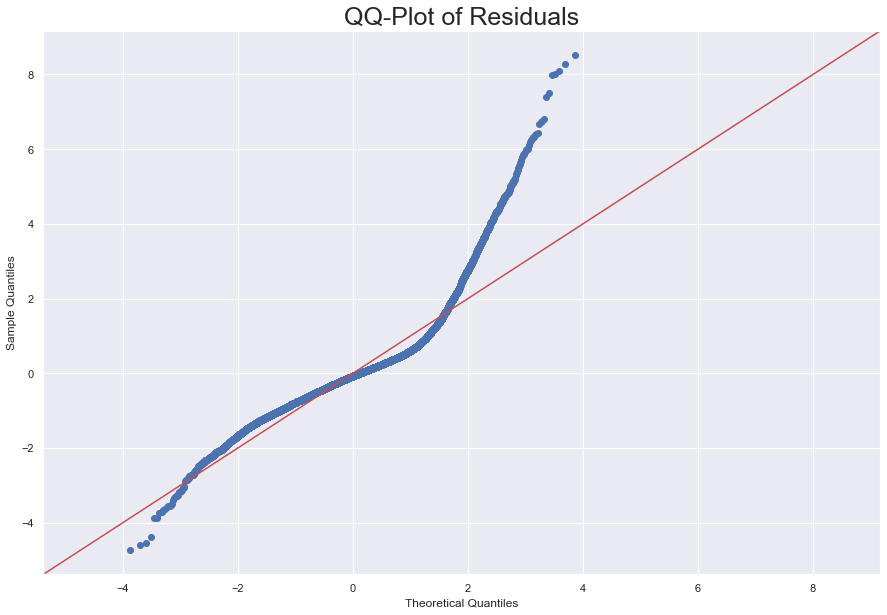

In [133]:
mf.normality_assumption(model18)

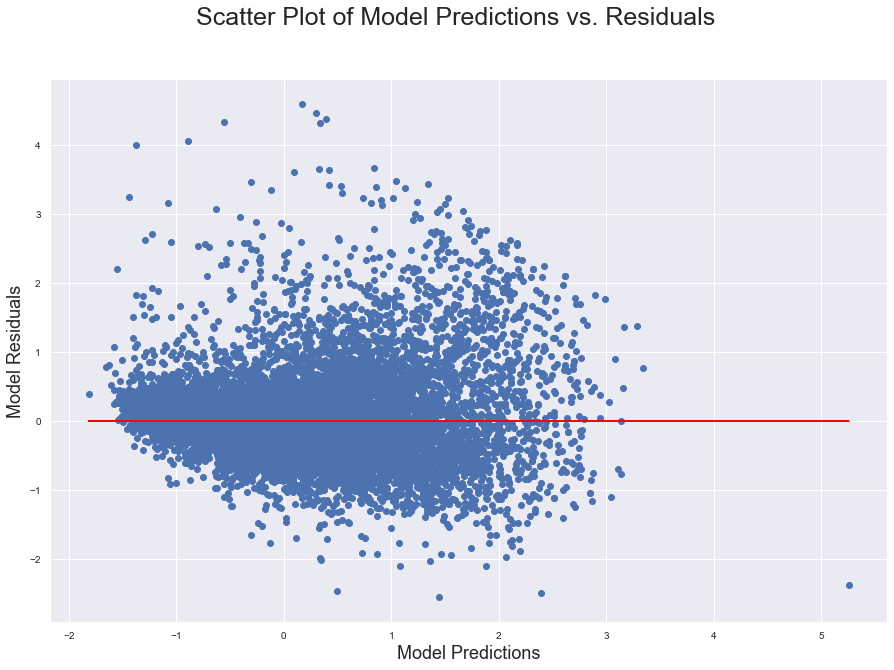

In [134]:
mf.homo_assumption(model18, df)

Again, no changes. For this reason, it would still be best to stick with model 14 that had the highest r^2 value of 0.708 since the assumptions are met much the same and model 18 and 14 have the same r^2 value.

Since we've added building grade and township to our model, I think we should get some extra info on these features and their average sale prices for each category.  See this exploration in the notebook `feature_vis1_lc`.

In [138]:
df.to_csv('../leana_m4')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Columns: 123 entries, documentdate to z_twnshp_26
dtypes: category(1), float64(53), int64(52), object(10), uint8(7)
memory usage: 16.1+ MB
